## Exercise

- In this exercise, we will work on a classification task of Brexit referendum vote
- The data is originally from British Election Study Online Panel
  - codebook: https://www.britishelectionstudy.com/wp-content/uploads/2020/05/Bes_wave19Documentation_V2.pdf
- The outcome is `LeaveVote` (1: Leave, 0: otherwise)
- The input we use are coming from the following article:
  - Hobolt, Sara (2016) The Brexit vote: a divided nation, a divided continent. _Journal of European Public Policy_, 23 (9) (https://doi.org/10.1080/13501763.2016.1225785)

In [5]:
!wget https://www.dropbox.com/s/up1zpkozgscaty1/brexit_bes_sampled_data.csv

--2020-12-15 15:05:31--  https://www.dropbox.com/s/up1zpkozgscaty1/brexit_bes_sampled_data.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/up1zpkozgscaty1/brexit_bes_sampled_data.csv [following]
--2020-12-15 15:05:32--  https://www.dropbox.com/s/raw/up1zpkozgscaty1/brexit_bes_sampled_data.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucab65b68fdd3a0e93fb3307b69a.dl.dropboxusercontent.com/cd/0/inline/BFGLd5dr3MtLZOEGEU3wbnMjbuP1QC4u8IX6Lj5t2kA2Y2E3kPTSON5NWbcZHDqAAduJL6p3PSgXTY-SR8ZG77-6wj_4pS_XdG42oU74HZrLlCc56hF7BofHHeptLIcZPqw/file# [following]
--2020-12-15 15:05:32--  https://ucab65b68fdd3a0e93fb3307b69a.dl.dropboxusercontent.com/cd/0/inline/BFGLd5dr3MtLZOEGEU3wbnMjbuP1QC4u8IX6Lj5t2kA2Y2E3kPTSON5NWbcZHDqAAd

## Import packages

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Load data

In [7]:
df_bes = pd.read_csv("brexit_bes_sampled_data.csv")

# Model

- There are four models in the article. We will use the idenity model (Model 2 in Table 2)
- List of input variables:
  gender, age, edlevel, hhincome, EuropeanIdentity, EnglishIdentity, BritishIdentity

In [8]:
df_bes_sub = df_bes[['gender', 'age', 'edlevel', 'hhincome', 'EuropeanIdentity', 'EnglishIdentity', 'BritishIdentity', 'LeaveVote']]

In [9]:
x = df_bes_sub.iloc[:, 0:7]
y = df_bes['LeaveVote']

# Train-test split

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .25, random_state = 42)

In [12]:
print(x_train.shape)
print(x_test.shape)

(1500, 7)
(500, 7)


# Data wrangling

In [13]:
from sklearn.preprocessing import StandardScaler
st_scaler = StandardScaler()

In [14]:
x_train = st_scaler.fit_transform(x_train)
x_test = st_scaler.transform(x_test)

In [15]:
x_test[:3]

array([[-1.01342342,  0.50775322,  0.71937721, -1.69515159,  0.69979419,
        -0.01998199,  0.89072259],
       [ 0.98675438,  1.09793518, -0.00726644, -0.52769182,  0.18245004,
         0.8882901 ,  0.89072259],
       [ 0.98675438,  1.39302616,  0.71937721, -1.1114217 ,  0.18245004,
         0.43415406, -0.36087824]])

## Fit logistic model

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
from sklearn.metrics import classification_report, confusion_matrix

In [18]:
logitmod = LogisticRegression()

In [19]:
logitmod.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [20]:
pred_logit = logitmod.predict(x_test)
pred_logit

array([0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,

In [53]:
print(confusion_matrix(y_test, pred_logit))
print(classification_report(y_test, pred_logit))

[[209  47]
 [ 47 197]]
              precision    recall  f1-score   support

           0       0.82      0.82      0.82       256
           1       0.81      0.81      0.81       244

    accuracy                           0.81       500
   macro avg       0.81      0.81      0.81       500
weighted avg       0.81      0.81      0.81       500



## KNN classifier

In [54]:
from sklearn.neighbors import KNeighborsClassifier

In [22]:
x_test.shape

(500, 7)

In [26]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [28]:
pred_knn = knn.predict(x_test)
pred_knn

array([0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,

In [30]:
print(confusion_matrix(y_test, pred_knn))
print(classification_report(y_test, pred_knn))

[[216  40]
 [105 139]]
              precision    recall  f1-score   support

           0       0.67      0.84      0.75       256
           1       0.78      0.57      0.66       244

    accuracy                           0.71       500
   macro avg       0.72      0.71      0.70       500
weighted avg       0.72      0.71      0.70       500



### Parameter tuning for KNN



In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, make_scorer
f1 = make_scorer(f1_score, average = 'binary', pos_label = 1)

In [47]:
knn2 = KNeighborsClassifier()
param_grid = {'n_neighbors': np.arange(1,25)}
knn_cv = GridSearchCV(knn2, param_grid, cv=10, verbose=2)
knn_cv.fit(x_train, y_train)
print(knn_cv.best_score_)
print(knn_cv.best_params_)
pred_knn2 = knn_cv.predict(x_test)
print(classification_report(y_test, pred_knn))
print(confusion_matrix(y_test, pred_knn))

Fitting 10 folds for each of 24 candidates, totalling 240 fits
[CV] n_neighbors=1 ...................................................
[CV] .................................... n_neighbors=1, total=   0.0s
[CV] n_neighbors=1 ...................................................
[CV] .................................... n_neighbors=1, total=   0.0s
[CV] n_neighbors=1 ...................................................
[CV] .................................... n_neighbors=1, total=   0.0s
[CV] n_neighbors=1 ...................................................
[CV] .................................... n_neighbors=1, total=   0.0s
[CV] n_neighbors=1 ...................................................
[CV] .................................... n_neighbors=1, total=   0.0s
[CV] n_neighbors=1 ...................................................
[CV] .................................... n_neighbors=1, total=   0.0s
[CV] n_neighbors=1 ...................................................
[CV] .........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] .................................... n_neighbors=2, total=   0.0s
[CV] n_neighbors=2 ...................................................
[CV] .................................... n_neighbors=2, total=   0.0s
[CV] n_neighbors=2 ...................................................
[CV] .................................... n_neighbors=2, total=   0.0s
[CV] n_neighbors=2 ...................................................
[CV] .................................... n_neighbors=2, total=   0.0s
[CV] n_neighbors=2 ...................................................
[CV] .................................... n_neighbors=2, total=   0.0s
[CV] n_neighbors=2 ...................................................
[CV] .................................... n_neighbors=2, total=   0.0s
[CV] n_neighbors=3 ...................................................
[CV] .................................... n_neighbors=3, total=   0.0s
[CV] n_neighbors=3 ...................................................
[CV] .

[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:    2.6s finished


### Final model

In [46]:
knn3 = KNeighborsClassifier()
param_grid2 = {'n_neighbors': np.arange(1,25)}
knn_cv2 = GridSearchCV(knn3, param_grid2, cv=10, scoring=f1, verbose=2)
knn_cv2.fit(x_train, y_train)
print(knn_cv2.best_score_)
print(knn_cv2.best_params_)
pred_knn3 = knn_cv2.predict(x_test)
print(classification_report(y_test, pred_knn3))
print(confusion_matrix(y_test, pred_knn3))

Fitting 10 folds for each of 24 candidates, totalling 240 fits
[CV] n_neighbors=1 ...................................................
[CV] .................................... n_neighbors=1, total=   0.0s
[CV] n_neighbors=1 ...................................................
[CV] .................................... n_neighbors=1, total=   0.0s
[CV] n_neighbors=1 ...................................................
[CV] .................................... n_neighbors=1, total=   0.0s
[CV] n_neighbors=1 ...................................................
[CV] .................................... n_neighbors=1, total=   0.0s
[CV] n_neighbors=1 ...................................................
[CV] .................................... n_neighbors=1, total=   0.0s
[CV] n_neighbors=1 ...................................................
[CV] .................................... n_neighbors=1, total=   0.0s
[CV] n_neighbors=1 ...................................................
[CV] .........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] .................................... n_neighbors=3, total=   0.0s
[CV] n_neighbors=3 ...................................................
[CV] .................................... n_neighbors=3, total=   0.0s
[CV] n_neighbors=3 ...................................................
[CV] .................................... n_neighbors=3, total=   0.0s
[CV] n_neighbors=3 ...................................................
[CV] .................................... n_neighbors=3, total=   0.0s
[CV] n_neighbors=3 ...................................................
[CV] .................................... n_neighbors=3, total=   0.0s
[CV] n_neighbors=3 ...................................................
[CV] .................................... n_neighbors=3, total=   0.0s
[CV] n_neighbors=3 ...................................................
[CV] .................................... n_neighbors=3, total=   0.0s
[CV] n_neighbors=3 ...................................................
[CV] .

[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:    2.8s finished


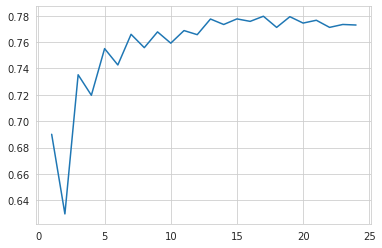

In [64]:
sns.set_style('whitegrid')
plt.plot(np.arange(1,25), knn_cv2.cv_results_['mean_test_score'])

In [ ]:
'''
# this is how to use cross_val_score to choose model and configs
from sklearn.cross_validation import cross_val_score
import matplotlib.pyplot as plt
k_range = range(1, 31)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
##    loss = -cross_val_score(knn, X, y, cv=10, scoring='mean_squared_error') # for regression
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy') # for classification
    k_scores.append(scores.mean())

plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()
'''

## Support Vector Classifier

- We try SVC here
- This is non-linear, parametric classifier
- Much more flexible than Logistic regression
- Fore more information, see Gareth et al, Chapter 9



In [48]:
from sklearn.svm import SVC
svcmod = SVC(gamma='auto')

In [ ]:
svcmod.fit(x_train, y_train)

In [ ]:
param_grid_svm = {'C':[1,10,100,1000],
                  'gamma':[1,0.1,0.001,0.0001],
                  'kernel':['rbf']}
svc_cv = GridSearchCV(SVC(), param_grid_svm, refit=True, verbose=2)
svc_cv.fit(x_train, y_train)